In [2]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Pick a few calibration FOVs

Loaded decoded: -1.9666802883148193


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.76it/s]


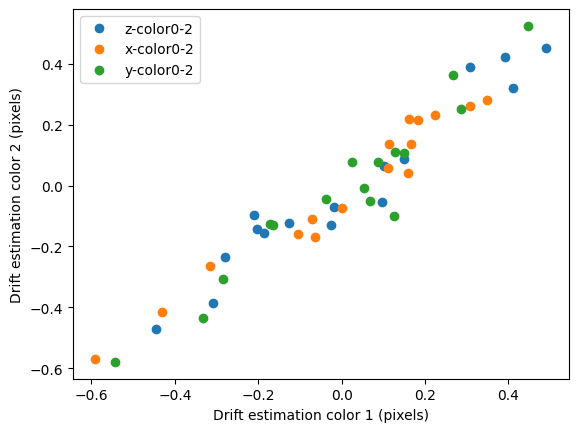

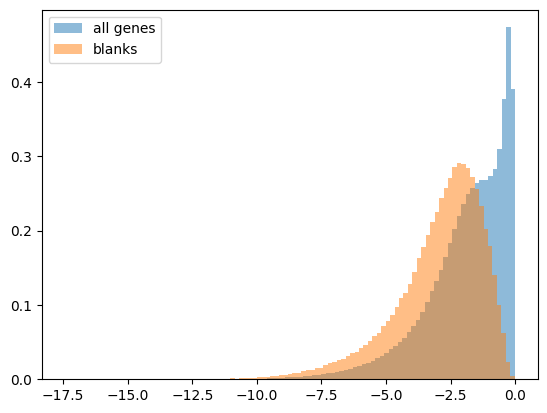

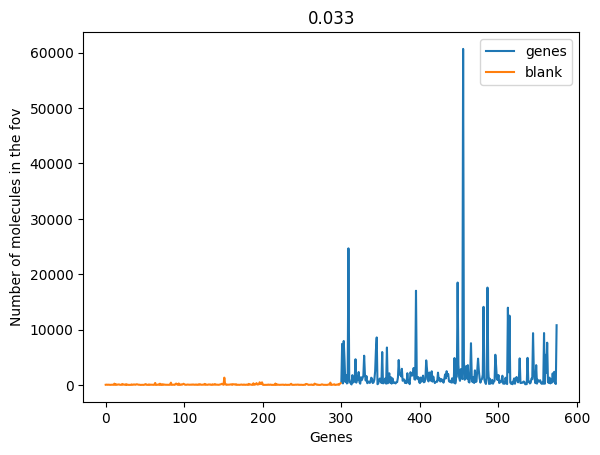

In [25]:
save_folder =r'\\192.168.0.21\bbfishdc21\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\MERFISH_Analysis'
fov,set_ = 'Conv_zscan__615', '_set1'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_flat_field(dec)
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None)
dec.th=-1
plot_statistics(dec)

In [20]:
viewer = plot_multigenes(dec,genes=['Sox11','Ptbp1','Gad1','Igfbpl1','Dsp','Psap'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=10)

In [21]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [11]:
scoresRef = None

### Calibrate smFISH signal

In [26]:
keepf =  dec.scoreA>dec.th ### keep good score
icodesf = dec.icodesN[keepf]
XHfpr = dec.XH_pruned[keepf]
XHf = np.mean(XHfpr,axis=1)
XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
#zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
XF[:,-1] = dec.scoreA[keepf]
XF[:,-2] = np.where(keepf)[0]
mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
XF[:,-3]=mnD
mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
XF[:,-4]=mnH
genesf = dec.gns_names[icodesf]

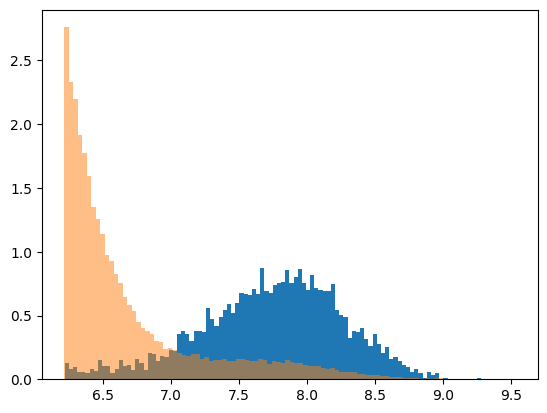

In [34]:
gene = 'Ptbp1'
tagH = 'Ptbp1'


XF_gene = XF[genesf==gene]
icol = XF_gene[0,-5].astype(int)

dec.get_XH_tag(tag = tagH)#Aldh
#Xh = norm_brightness(dec,dec.Xh)
Xh = dec.Xh
Xh = Xh[(Xh[:,-2]==icol)&(Xh[:,-3]>500)]


dsts,inds = cKDTree(Xh[:,:3]).query(XF_gene[:,:3])
Xh_ = Xh[inds[(dsts<10)],:]
plt.hist(np.log(Xh_[:,-3]),bins=100,density=True);
plt.hist(np.log(Xh[:,-3]),bins=100,density=True,alpha=0.5);

In [38]:
[2700,2000,1600]

[2700, 2000, 1600]

### Given the base decoding for each fov, run across all datasets with consistent values

In [1]:
import sys
sys.path.append(r'..\\')
from ioMicro import *
save_folder =r'\\192.168.0.21\bbfishdc21\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [2]:
fov_fls = glob.glob(save_folder+os.sep+'fov*')
elems = [(fov.replace('.zarr',''),fov_fl.split('__')[-1].split('.')[0]) 
 for fov_fl in fov_fls for fov in np.load(fov_fl)]

In [3]:
dec_fls = glob.glob(save_folder+os.sep+"decoded*")
elems_dec = [tuple(fl.split('decoded_')[-1].replace('.npz','').split('--')) for fl in dec_fls]

In [4]:
len(elems_dec),len(elems)

(1454, 1478)

In [5]:
missing = [e for e in elems if e not in elems_dec]

In [6]:
parms = [(set_,int(fov.split('_')[-1])) for fov,set_ in missing]

In [ ]:
from workerScope3New import *
for set_,ifov in tqdm(parms):
    main_f((set_,ifov),try_mode=True,old_method=True)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

Computing fitting on: Conv_zscan__143.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 412.53it/s]


Computing drift on: Conv_zscan__143.zarr
Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [02:30<00:00,  6.01s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [11:14<00:00, 224.80s/it]


Unfolded molecules: 338.8377032279968
Computed the decoding: 386.49173760414124



100%|███████████████████████████████████████████████████████████████████| 23943225/23943225 [04:55<00:00, 80934.35it/s]


Computed best unique assigment: 300.7576742172241


  4%|███▎                                                                          | 1/24 [42:36<16:20:01, 2556.59s/it]

Computing fitting on: Conv_zscan__566.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [36:59<00:00, 88.79s/it]


Computing drift on: Conv_zscan__566.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [08:09<00:00, 19.60s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:04<00:00, 12.20s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [11:26<00:00, 228.96s/it]


Unfolded molecules: 287.8461184501648
Computed the decoding: 347.0505802631378



100%|███████████████████████████████████████████████████████████████████| 21189218/21189218 [12:01<00:00, 29386.87it/s]


Computed best unique assigment: 725.6680836677551


  8%|██████▎                                                                     | 2/24 [2:18:50<27:11:17, 4449.00s/it]

Computing fitting on: Conv_zscan__567.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [52:58<00:00, 127.14s/it]


Computing drift on: Conv_zscan__567.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:58<00:00, 14.35s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:08<00:00, 14.73s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [13:04<00:00, 261.34s/it]


Unfolded molecules: 327.85946822166443
Computed the decoding: 360.73110914230347



100%|███████████████████████████████████████████████████████████████████| 21942289/21942289 [16:18<00:00, 22434.57it/s]


Computed best unique assigment: 982.6117327213287


 12%|█████████▌                                                                  | 3/24 [4:18:29<33:13:34, 5695.91s/it]

Computing fitting on: Conv_zscan__568.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [43:20<00:00, 104.03s/it]


Computing drift on: Conv_zscan__568.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:52<00:00, 14.08s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [08:12<00:00, 19.70s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [13:44<00:00, 274.86s/it]


Unfolded molecules: 328.5939290523529
Computed the decoding: 378.4746513366699



 36%|████████████████████████▌                                           | 8176151/22681564 [09:44<15:17, 15816.73it/s]

In [8]:
parms

[('_set1', 143),
 ('_set1', 566),
 ('_set1', 567),
 ('_set1', 568),
 ('_set1', 569),
 ('_set1', 610),
 ('_set1', 618),
 ('_set2', 6),
 ('_set2', 64),
 ('_set2', 65),
 ('_set2', 75),
 ('_set2', 110),
 ('_set2', 111),
 ('_set2', 112),
 ('_set2', 113),
 ('_set2', 114),
 ('_set2', 116),
 ('_set2', 135),
 ('_set2', 212),
 ('_set2', 358),
 ('_set2', 359),
 ('_set2', 360),
 ('_set3', 74),
 ('_set3', 75)]

In [7]:
fov,set_ = ('Conv_zscan__029', '_set1')
save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=False,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[10000,10000,8500],force=False)

### Run workerSaveFinal

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=False,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[10000,10000,8500],force=False)

In [5]:
import sys
sys.path.append(r'..\\')
from ioMicro import *
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'

In [11]:
fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [16]:
times = [os.path.getctime(fl) for fl in fls]
np.mean(np.diff(np.sort(times).astype(int)))*900/60

125.64285714285715

### Get counts per cell into a single dataset

In [17]:
import pandas as pd
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [18]:
len(save_fls)

826

In [90]:
save_fls_ = [fl for fl in save_fls if ('_set3' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.38it/s]


In [91]:
save_folder = r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis\final_spots'
if not os.path.exists(save_folder): os.makedirs(save_folder)
df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_df_newCellSeg.pkl')
cell_df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_cell_df_newCellSeg.pkl')

In [112]:
df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_df_newCellSeg.pkl')
cell_df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_cell_df_newCellSeg.pkl')

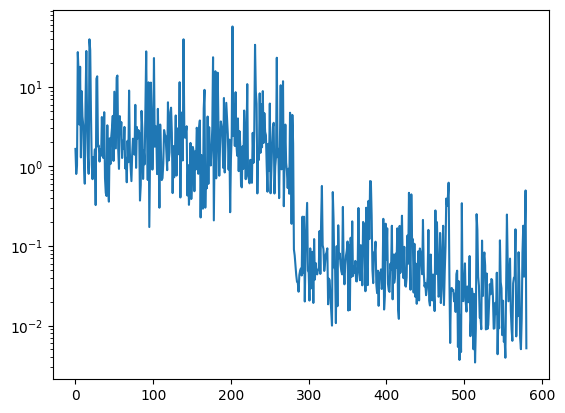

In [113]:
plt.semilogy(np.nanmean(df,axis=0))

In [93]:
          
def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,pixel_size = 0.10833*4,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20):
    xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    ycells = cell_df['yc']*pixel_size-cell_df['xfov']

    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    
    cts = np.array(df[gene])#Ptbp1_smFISH
    
    cts[np.isnan(cts)]=0
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    XC = -Xcells[good_cells,::-1]
    viewer = napari.view_points(XC,size=size,face_color=cols[good_cells],name=gene)
    if plt_fov:
        ifovs = np.array(list(df.index),dtype=int)//10**5
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.1f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)

In [126]:
plot_gene_mosaic_cells(df,cell_df,'Dcx_smFISH',plt_fov=False,pixel_size = 0.10833*4,transpose=-1)

In [57]:
list(df.keys())

['Abhd2',
 'Acer3',
 'Acta2',
 'Actb',
 'Actg1',
 'Adarb2',
 'Adcy1',
 'Adcy2',
 'Adgrl3',
 'Agt',
 'Ahcyl2',
 'Aif1l',
 'Aldh1a1',
 'Aldh1l1_smFISH',
 'Aldoc',
 'Aqp4',
 'Arx',
 'Ascl1',
 'Atp1a2',
 'Atp1b1',
 'Auts2',
 'Bcl2',
 'Bdnf',
 'Bhlhe22',
 'Bmp2',
 'Bmp4',
 'Brinp3',
 'Bsg',
 'Bsn',
 'Btg2',
 'C1qa',
 'C1ql1',
 'C1ql3',
 'Calb1',
 'Calb2',
 'Casp3',
 'Casp9',
 'Cck',
 'Cd14',
 'Cd74',
 'Cdh12',
 'Cdh13',
 'Cdh18',
 'Cdk1',
 'Cdk4',
 'Chrdl1',
 'Clasp1',
 'Cldn5',
 'Cnr1',
 'Cntnap5b',
 'Cox6a1',
 'Csmd1',
 'Cspg4',
 'Cspg5',
 'Cst3',
 'Dcc',
 'Dcx',
 'Dcx_smFISH',
 'Dgat2',
 'Dgkb',
 'Dgkh',
 'Dlx1',
 'Dlx2',
 'Dpysl3',
 'Dsp',
 'Efna5',
 'Egfem1',
 'Eif4a2',
 'Elavl2',
 'Elavl3',
 'Elavl4',
 'Emx1',
 'Emx2',
 'Eomes',
 'Erbb4',
 'Etv4',
 'F3',
 'Fam107a',
 'Fam210b',
 'Fam214a',
 'Fbll1',
 'Flt1',
 'Fos',
 'Foxa1',
 'Foxa2',
 'Foxg1',
 'Frmd4a',
 'Frzb',
 'Fxyd6',
 'Fxyd7',
 'Fyn',
 'Gabbr1',
 'Gabra1',
 'Gabra2',
 'Gad1',
 'Gal',
 'Gda',
 'Gfap',
 'Gja1',
 'Gli1',
 'Gm1007